In [ ]:
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install folium 
!pip install plotly_express


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-ibupl0nw
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-ibupl0nw
  Created wheel for geopandas: filename=geopandas-0.8.0+95.g5119410-py2.py3-none-any.whl size=980276 sha256=16c9cea90b64c132063927fa4e6cad9eccedb846224d7cfe617c5a4052b2a80b
  Stored in directory: /tmp/pip-ephem-wheel-cache-aiqbx700/wheels/91/24/71/376c9c67192694168352

In [ ]:
import pandas as pd 
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
!wget https://www.dropbox.com/s/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
!unzip yelp_academic_dataset_business.zip

--2021-01-31 00:44:21--  https://www.dropbox.com/s/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3x1w789mmuae3ao/yelp_academic_dataset_business.zip [following]
--2021-01-31 00:44:21--  https://www.dropbox.com/s/raw/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc81c52bcede54e943207ad02035.dl.dropboxusercontent.com/cd/0/inline/BIB87V-pDd3apn_UP0IS3XjUWybQ7Bq4aJO6aSKPDb28Itpfdm0MwZX0MI8SdieXHaz_JC-YNepAqWEH6BoOx6ilslGglYuU-LeLimw7TIHX-HjdvWiNWnUtfksR5nbdPhg/file# [following]
--2021-01-31 00:44:21--  https://uc81c52bcede54e943207ad02035.dl.dropboxusercontent.com/cd/0/inline/BIB87V-pDd3apn_UP0IS3XjUWybQ7Bq4aJO6aSKPDb28I

In [ ]:
df['categories'].value_counts()

Restaurants, Pizza                                                                                                         1042
Nail Salons, Beauty & Spas                                                                                                 1031
Pizza, Restaurants                                                                                                          993
Beauty & Spas, Nail Salons                                                                                                  947
Food, Coffee & Tea                                                                                                          888
                                                                                                                           ... 
Restaurants, Barbeque, Mediterranean, Middle Eastern                                                                          1
Food, Food Stands, Food Trucks, Restaurants                                                             

In [ ]:
df['Grocery'] = df['categories'].str.contains('Grocery')
df_grocery = df.loc[df.Grocery == True]
df_grocery.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Grocery
54,c-BELKj0SvNhBesQMf-bKw,Circle K,3101 W Northern Ave,Phoenix,AZ,85051,33.552850,-112.125975,2.5,3,1,{'BusinessAcceptsCreditCards': 'True'},"Convenience Stores, Automotive, Food, Gas Stat...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True
107,jtlAfuINMCYVFpjwMgy2jw,Medium Rare,5241 Dundas Street W,Toronto,ON,M9B 1A5,43.638879,-79.537632,4.0,22,0,"{'RestaurantsPriceRange2': '3', 'BikeParking':...","Grocery, Restaurants, Steakhouses, Butcher, Food","{'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...",True
165,kGal388xLnmCwI4mw2TG8Q,J-C Foodland,270 Wellington Street W,Toronto,ON,M5V 3P5,43.644895,-79.391717,3.0,7,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsTa...","Food, Grocery, Convenience Stores","{'Monday': '7:30-0:0', 'Tuesday': '7:30-0:0', ...",True
225,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'OutdoorSeating': 'False', 'RestaurantsAttire...","Food, Grocery, Restaurants, Middle Eastern",None,True
249,IjGU7ZopsgeomsDQf20UXQ,Japanese Specialties,"4860 S Eastern Ave, Ste 3",Las Vegas,NV,89119,36.100592,-115.117296,4.0,4,0,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Grocery, Food, Specialty Food","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",True


In [ ]:
df_grocery.shape

(3666, 15)

In [ ]:
df_grocery['state'].value_counts()

AZ    913
ON    738
NV    473
OH    367
NC    323
PA    252
QC    227
AB    176
WI    117
IL     48
SC     31
NE      1
Name: state, dtype: int64

In [ ]:
df['Restaurants'] = df['categories'].str.contains('Restaurants')
df_restaurants = df.loc[df.Restaurants == True]
df_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Grocery,Restaurants
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",False,True
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",False,True
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",False,True
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",False,True
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None,False,True


In [ ]:
df_restaurants.shape

(59371, 16)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



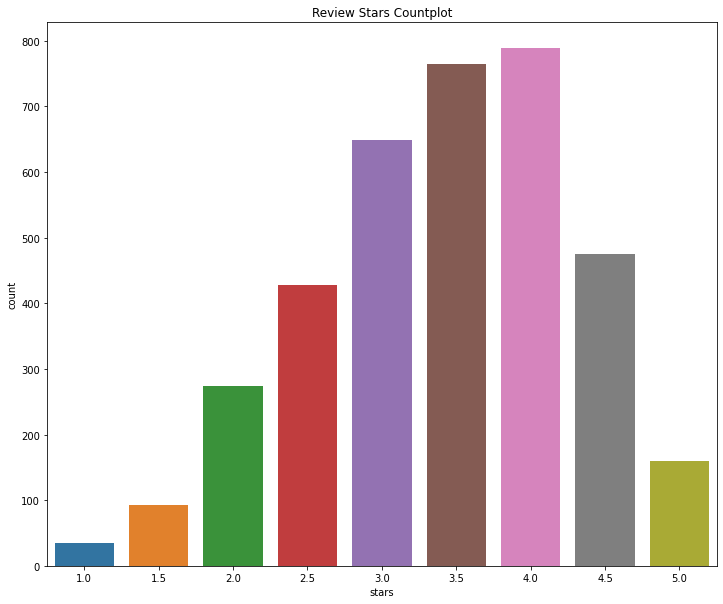

In [ ]:

fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(df_grocery['stars'], ax=ax)
plt.title('Review Stars Countplot')
plt.savefig('stars.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



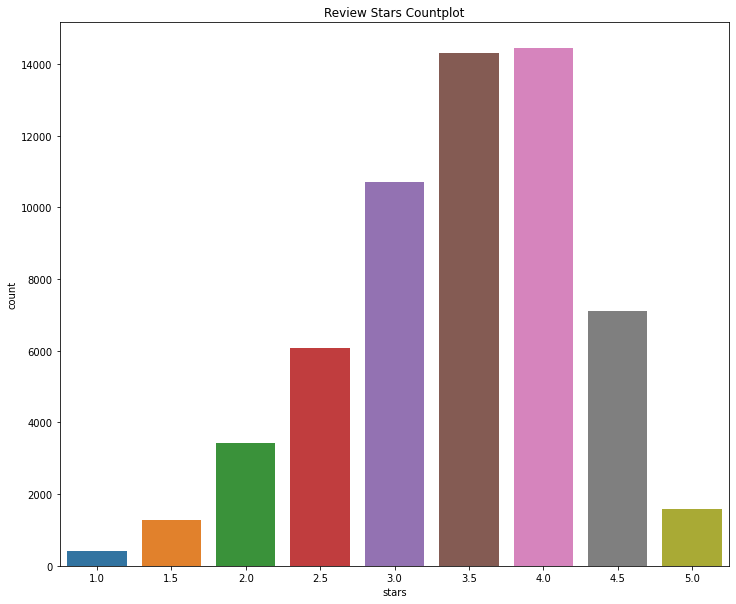

In [ ]:

fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(df_restaurants['stars'], ax=ax)
plt.title('Review Stars Countplot')
plt.savefig('stars.png')
plt.show()

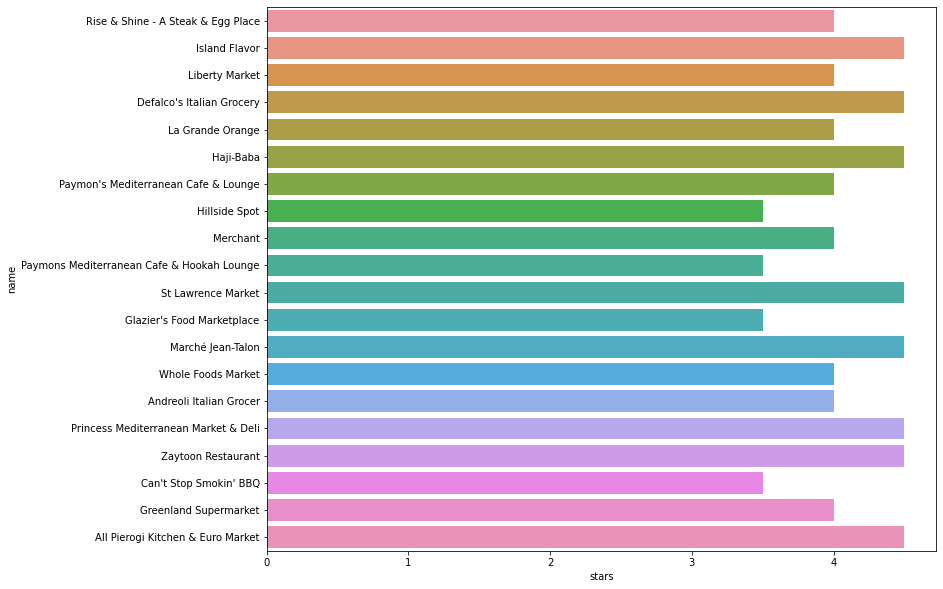

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x = 'stars', y = 'name', data=top_grocery, ax= ax);
plt.savefig('top20_grocery.png')
plt.show()

In [ ]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
#configure_plotly_browser_state()
px.scatter_mapbox(df_grocery, lat="latitude", lon="longitude", color="stars", size='review_count' ,
                   size_max=30, zoom=3, width=1200, height=800)

In [ ]:
Arizona = df_grocery[df_grocery.state == 'AZ']
px.scatter_mapbox(Arizona, lat="latitude", lon="longitude", color="stars", size='review_count' ,
                   size_max=15, zoom=10, width=1200, height=800)

In [ ]:
# Elbow method to determine the number of K in Kmeans Clustering
coords = Arizona[['longitude','latitude']]

distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

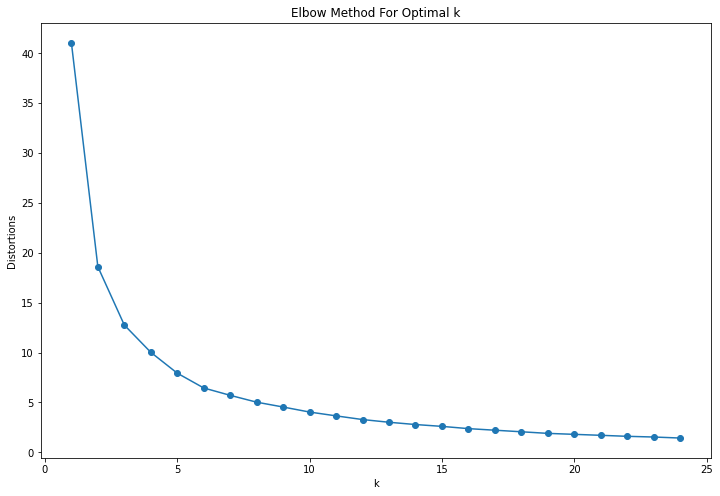

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

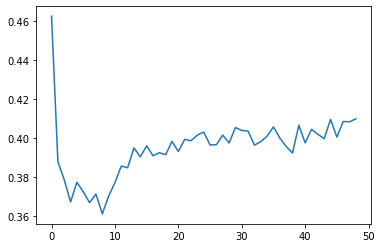

In [ ]:
plt.plot(sil)

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

k = 5  silhouette_score  0.3665997387431182


In [ ]:
Arizona['cluster'] = kmeans.predict(Arizona[['longitude','latitude']])
Arizona.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Grocery,cluster
54,c-BELKj0SvNhBesQMf-bKw,Circle K,3101 W Northern Ave,Phoenix,AZ,85051,33.552850,-112.125975,2.5,3,1,{'BusinessAcceptsCreditCards': 'True'},"Convenience Stores, Automotive, Food, Gas Stat...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True,0
750,JXmYodz9jw1P23Ygx4OZTQ,Sprouts Farmers Market,10134 W Happy Valley Rd,Peoria,AZ,85383,33.713017,-112.277583,4.5,27,1,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Specialty Food, Food, Grocery, Fruits & Veggie...","{'Monday': '7:0-22:0', 'Tuesday': '7:0-22:0', ...",True,2
851,RbZK0G5GJtcXNIXYRB9pzQ,Fresh & Easy,3000 N Alma School Rd,Chandler,AZ,85224,33.350169,-111.860191,4.5,30,0,"{'BikeParking': 'True', 'RestaurantsPriceRange...","Grocery, Shopping, Food, Florists, Flowers & G...","{'Monday': '6:0-0:0', 'Tuesday': '6:0-0:0', 'W...",True,1
1226,QIJxtz1zrakTZDgyTNm5hw,Circle K,15262 N Tatum Blvd,Phoenix,AZ,85032,33.625634,-111.978425,2.5,4,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Food, Convenience Stores, Coffee & Tea, Gas St...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",True,3
2311,bLSuFAdnPOyWt9s0rCjv_A,Fry's Food & Drug,7628A E Indian School Rd,Scottsdale,AZ,85251,33.495775,-111.915924,3.0,52,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping, Grocery, Food, Drugstores","{'Monday': '6:0-0:0', 'Tuesday': '6:0-0:0', 'W...",True,4


In [ ]:
px.scatter_mapbox(Arizona, lat="latitude", lon="longitude", color="cluster", size='review_count', 
                  hover_data= ['name', 'latitude', 'longitude'], zoom=10, width=1200, height=800)

In [ ]:
top_grocery_Arizona = Arizona.sort_values(by=['review_count', 'stars'], ascending=False)
top_grocery_Arizona.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Grocery,cluster
62870,3N9U549Zse8UP-MwKZAjAQ,Liberty Market,230 N Gilbert Rd,Gilbert,AZ,85234,33.354768,-111.789833,4.0,1315,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Grocery, Food, Restaurants, Breakfast & Brunch...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",True,1
15829,r5PLDU-4mSbde5XekTXSCA,Defalco's Italian Grocery,"2334 N Scottsdale Rd, Ste A133",Scottsdale,AZ,85257,33.474059,-111.927144,4.5,1272,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Sandwiches, Delis, Grocery, Food, Italian, Res...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",True,4
82816,D3dAx-QW_uuClz4MambeHA,La Grande Orange,4410 N 40th St,Phoenix,AZ,85018,33.502313,-111.995752,4.0,869,1,"{'BusinessAcceptsCreditCards': 'True', 'BYOBCo...","Food, Shopping, Coffee & Tea, American (New), ...","{'Monday': '5:30-10:0', 'Tuesday': '5:30-10:0'...",True,4
31654,2GmGT-7QjowR1ihup3FbVA,Haji-Baba,1513 E Apache Blvd,Tempe,AZ,85281,33.414271,-111.913451,4.5,800,1,"{'WiFi': 'u'no'', 'BusinessParking': '{'garage...","Grocery, Mediterranean, Food, Restaurants, Gre...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ...",True,4
180829,fKm6mfATDJRDDQH0PtZeeQ,Hillside Spot,4740 E Warner Rd,Phoenix,AZ,85044,33.331915,-111.981341,3.5,541,1,"{'BikeParking': 'True', 'GoodForKids': 'True',...","American (Traditional), Food, Burgers, Grocery...","{'Monday': '6:30-21:0', 'Tuesday': '6:30-21:0'...",True,4


In [47]:
def recommend_grocery(df, longitude, latitude):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print(cluster)
   
    # Get the best restaurant in this cluster
    return  df[df['cluster']==cluster].iloc[0:5][['name', 'latitude','longitude','stars','review_count'	]]

In [36]:
Arizona_res = df_restaurants[df_restaurants['state'] == 'AZ']
Arizona_res

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Grocery,Restaurants
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",False,True
78,44YFU284Z3KDEy25QyVoUw,Nee House Chinese Restaurant,"13843 N Tatum Blvd, Ste 15",Phoenix,AZ,85032,33.613020,-111.977036,3.5,269,1,"{'Caters': 'True', 'GoodForKids': 'True', 'Noi...","Chinese, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",False,True
133,ysfeDcLAYk_MVzfBmyiSTg,Vals Getaway DES Cafeteria,1789 W Jefferson,Phoenix,AZ,85007,33.446805,-112.097129,3.0,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Food, Cafes",None,False,True
140,r8764MtYyt8JhxMvrfM_xQ,Vintage 95,95 W Boston,Chandler,AZ,85225,33.302093,-111.842613,4.0,320,0,"{'OutdoorSeating': 'True', 'HasTV': 'True', 'N...","American (New), Bars, Wine Bars, Nightlife, Re...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",False,True
146,voZnDQs6Hs3YpNcS-9TALg,New Mexican Grill,"3140 S Gilbert Rd, Ste 3",Chandler,AZ,85286,33.261325,-111.790815,4.0,84,0,"{'GoodForKids': 'True', 'RestaurantsReservatio...","Restaurants, Mexican",None,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192450,3lhLsfwnQ1ziGuME_qDNKA,Razzleberriez Frozen Yogurt,25225 North Lake Pleasant Pkwy,Peoria,AZ,85383,33.713475,-112.269849,4.0,21,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Ice Cream & Frozen Yogurt, Specialty Food, Res...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",False,True
192459,GgX6-0pL0_MWdGj2Nr8xEA,Dog Town Chili Dogs,"690 S Mill Ave, Ste 110",Tempe,AZ,85281,33.423411,-111.940490,3.5,6,0,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","Food, Restaurants, Hot Dogs",None,False,True
192463,_r-OvLO5wqncmsBCg3i0qw,Pomo Pizzeria Gilbert,"366 N Gilbert Rd, Ste 106",Gilbert,AZ,85234,33.356542,-111.790019,4.0,337,1,"{'WheelchairAccessible': 'True', 'WiFi': 'u'fr...","Restaurants, Italian, Pizza","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",False,True
192501,I3dQmMkfqMsThMAuqIkooA,Smashburger,"2837 N Power Rd, Ste 102",Mesa,AZ,85215,33.467537,-111.682818,3.0,151,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Salad, Restaurants, Hot Dogs, American (Tradit...","{'Monday': '10:0-21:30', 'Tuesday': '10:0-21:3...",False,True


In [35]:
np.arange(1,len(Arizona_res)+1)

array([    1,     2,     3, ..., 11463, 11464, 11465])

In [43]:
test_coordinates = {
    'user': np.arange(1,len(Arizona_res)+1), 
    'name': Arizona_res['name'],
    'latitude' : Arizona_res['latitude'],
    'longitude' : Arizona_res['longitude'],
}

test_df = pd.DataFrame(test_coordinates)
test_df = test_df.reset_index()
test_df

,index,user,name,latitude,longitude
0,11,1,Taco Bell,33.495194,-112.028588
1,78,2,Nee House Chinese Restaurant,33.613020,-111.977036
2,133,3,Vals Getaway DES Cafeteria,33.446805,-112.097129
3,140,4,Vintage 95,33.302093,-111.842613
4,146,5,New Mexican Grill,33.261325,-111.790815
...,...,...,...,...,...
11460,192450,11461,Razzleberriez Frozen Yogurt,33.713475,-112.269849
11461,192459,11462,Dog Town Chili Dogs,33.423411,-111.940490
11462,192463,11463,Pomo Pizzeria Gilbert,33.356542,-111.790019
11463,192501,11464,Smashburger,33.467537,-111.682818


In [48]:
res1 = test_df[test_df['user'] == 1]
res1

,index,user,name,latitude,longitude
0,11,1,Taco Bell,33.495194,-112.028588


In [50]:
#example: new resterants could directly replace test_df['longitude'][0] and test_df['latitude'][0] with their own longitude and latitude
recommend_grocery(top_grocery_Arizona, 	test_df['longitude'][0], test_df['latitude'][0] )

4


,name,latitude,longitude,stars,review_count
15829,Defalco's Italian Grocery,33.474059,-111.927144,4.5,1272
82816,La Grande Orange,33.502313,-111.995752,4.0,869
31654,Haji-Baba,33.414271,-111.913451,4.5,800
180829,Hillside Spot,33.331915,-111.981341,3.5,541
113756,Princess Mediterranean Market & Deli,33.407997,-111.887898,4.5,385


In [49]:
fig = px.scatter_mapbox(recommend_grocery(top_grocery_Arizona, res1.longitude, res1.latitude), lat="latitude", lon="longitude",  
                   zoom=10, width=1200, height=800, hover_data= ['name', 'latitude', 'longitude'])
fig.add_scattermapbox(lat=res1["latitude"], lon= res1["longitude"]).update_traces(dict(mode='markers', marker = dict(size = 15)))

4
